<h1 align="center" style="color: #A9A9A9;"> Welcome to the Quantum Chemistry </h1>

# <a id='toc1_'></a>[ ](#toc0_)
---


|$\LARGE \textbf{\textcolor{red}{gdb9: Openbabel xTB-crest and Pyscf Quantum Chemistry Calculations Assessment}}$
|                                                                                                                          
---


 ###  **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm

 
* Department of Physics, Faculty of Science, University of Yaounde I,  Ph.D Candidate
* AtomiC Molecular Physics et Biophysics
  
23 FEVRIER 2025

---

<table width="100%"><tr style="background-color:white;">
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://qworld.net" target="_blank">
            <img src="images/QC.jpg"></a></td>
            <img src="images/ML.jpeg"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->
    <td style="padding:0px;width:40px;">
        <a href="https://github.com/GitNindjapatrick/" target="_blank">
        <img align="right" src="images/github.png" width="40px"></a> </td>
    <td style="padding:0px;width:5px;"></td>
    <td style="padding:0px;width:40px;">
        <a href="https://linkedin.com/in/patrick-sorrel-mvoto-kongo-641a41273" target="_blank">
        <img align="right" src="images/LinkedIn.png"></a></td>
    <td style="padding:0px;width:5px;"></td>
    <!-- ############################################# -->
    <td style="padding:0px;width:40px;">
        <a href="https://discord.MVOTO.net"
           target="_blank">
        <img align="right" src="images/discord.jpeg"></a></td>
</tr></table>


[Assessing the Synthetic Compatibility of GDB-9 Molecules with PCBM and PCDTBT for Organic Solar Cells: A Computational Approach](First_test_result.ipynb) &nbsp;|&nbsp;
[Computational Screening of GDB-9 Molecules for Organic Semiconductors](MVOTO_EXTRACTION_GDB.ipynb)&nbsp;|&nbsp;
[PCE: Designing Organic Donor and Acceptor Molecules for Photovoltaic Devices](PCE_GDB9.ipynb) &nbsp;|&nbsp;
|[gdb9: Openbabel xTB-crest and Pyscf Quantum Chemistry Calculations Assessment](MVOTO_PROPRIETES.ipynb)&nbsp;|&nbsp;


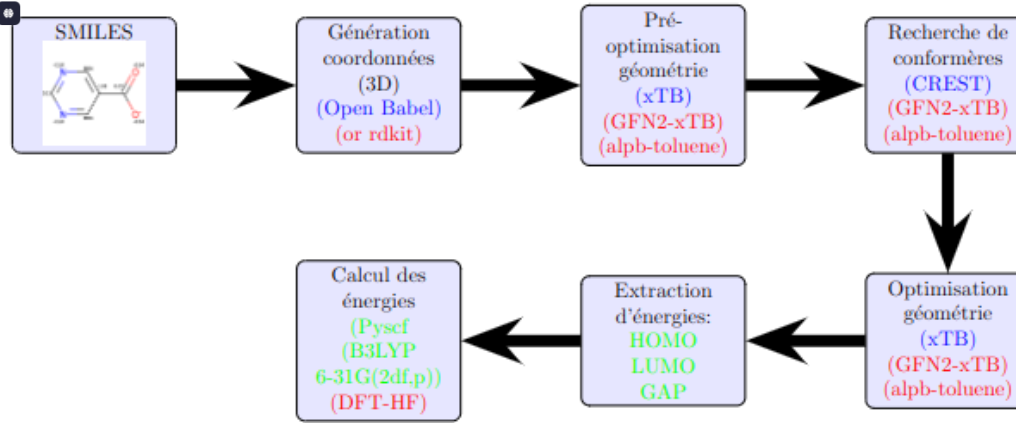

In [4]:

from IPython.display import Image
Image(filename='worflow.png', format='png', width=1500, height=1500)

---
## <a id='toc1_'></a>[**Problèmes rencontrés lors de l'implémentation du flux de travail**](#toc0_)

indiquant qu'il n'a pas été en mesure d'identifier une liaison disponibles

*niveau de recurrences des problemes:
faible (<font size="+1" color="7777ee">&#9733;</font>), 
moyenne (<font size="+1" color="7777ee">&#9733;&#9733;</font>), and
elevee (<font size="+1" color="7777ee">&#9733;&#9733;&#9733;</font>).*

<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9733;</font> |
[Échec du processus de optimisation géométrique]() 
<br>
<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&#9733;&#9733;</font> |
[`RDKit` modifie rapidement la topologie, en contraste avec `OpenBabel`, qui conserve mieux la structure initiale lors des calculs.]()
<br>
<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&#9733;&#9733;</font> |
[Changement de topologie détecté après la pré-optimisation en entrée, en tant qu'artefact du niveau de théorie choisi `GFN`, entraînant l'arrêt anormal de la recherche de conformères avec CREST]()
<br>
<font size="+1" color="7777ee">&#9734;&#9733;&#9733;</font> |
[Échec d'`OpenBabel` lors de la tentative de définition de la stéréochimie indiquant qu'il n'a pas été en mesure d'identifier une liaison disponibles]()
<br>
<font size="+1" color="7777ee">&#9733;&#9733;&#9733;</font> |
[Échec du processus de pré-optimisation géométrique]()

---
# **Workflow pour l'Optimisation des Molécules**

## **1. Image SMILES**
Nous commençons par une représentation SMILES de la molécule. Cette structure en 2D est convertie en coordonnées 3D à l'aide de l'outil Open Babel.
---
## **2. Génération des Coordonnées 3D**
- **Objectif :** Transformer la représentation SMILES en une structure 3D.
- **Méthodes :** RDKit ou Open Babel génèrent les coordonnées 3D à partir de la représentation SMILES.
- **Défis :** Il peut y avoir des problèmes de conversion stéréochimique (e.g., OpenBabel peut échouer à identifier un lien spécifique).
---
## **3. Pré-optimisation avec xTB**
- **Objectif :** Pré-optimiser la géométrie moléculaire pour minimiser l'énergie.
- **Méthode :** Utiliser xTB avec différents niveaux de théorie (`GFN0`, `GFN1`, `GFN2`).
- **Checkpoint :** Vérifier la convergence de la géométrie après chaque pré-optimisation. Si l'optimisation échoue, changer de niveau de théorie et réessayer.
- **Action si échec :** Si tous les niveaux de théorie échouent, retirer la molécule du dataset.
---
## **4. Recherche de Conformères avec CREST**
- **Objectif :** Explorer différentes conformations énergétiquement viables pour la molécule.
- **Méthode :** Utiliser CREST pour la recherche de conformères après la pré-optimisation.
- **Checkpoint :** Vérifier la topologie après la recherche de conformères. Si un changement de topologie est détecté, réoptimiser en changeant de niveau de théorie.
- **Action si échec :** Si toutes les tentatives échouent, retirer la molécule du dataset.
---
## **Hypothèses de Dépannage**

### **1. Échec de la pré-optimisation de la géométrie**
- Ajouter un **checkpoint** après chaque pré-optimisation.
- Si l'optimisation échoue, essayer un autre niveau de théorie (`GFN2`, `GFN1`, `GFN0`).
- Si tous échouent, retirer la molécule du dataset.
---
### **2. Changement de Topologie après Pré-optimisation**
- Ajouter un **checkpoint** après la recherche de conformères.
- En cas de changement de topologie, réoptimiser la géométrie avec un autre niveau de théorie.
- Si tous échouent, retirer la molécule du dataset.


---
<div class="alert alert-info">
     <strong> 
<br>Ce workflow structuré permet de gérer les problèmes potentiels tout en assurant la robustesse du pipeline d'analyse moléculaire. 
</br>
    <strong> 
</div>



---

### <a id='toc1_'></a>[Utilisation de Pandas  pour extraire les information dans le fichiers `filtered_molecules.pkl` et creer un DataFrame](#toc0_)


Le dataset initial utilisé dans cette étude est composé de `524` molécules (`filtered_molecules.pkl`) organiques stables constituées des éléments `C,H,O,N,F`. Ces molécules représentent un sous-ensemble du dataset `GDB-9`, qui fait partie d'une base de données plus vaste, le `GDB-17`, comprenant `166 milliards` de molécules organiques possibles.

Le dataset `GDB-9` contient des propriétés géométriques, énergétiques, et électroniques calculées pour environ `134 000` molécules, incluant les énergies des orbitales `HOMO`  et `LUMO`, ainsi que le gap énergétique entre ces deux niveaux. Toutes les propriétés ont été calculées au niveau de théorie `B3LYP/6-31G(2df,p)` en chimie quantique.

Les molécules sont constituées de jusqu'à neuf atomes lourds `(C, O, N, F)`, et les géométries minimales en énergie ont été déterminées. Pour la stœchiométrie prédominante, `C$_7$H$_{10}$O$_2$`, des propriétés supplémentaires comme les énergies, enthalpies et énergies libres d'atomisation ont été rapportées au niveau théorique `G4MP2`, un niveau plus précis de chimie quantique .

In [ ]:


import time
from pathlib import Path
import os
from rdkit import Chem

from rdkit.Chem import AllChem
import rdkit
import subprocess as sp

import re

import subprocess,os

import pandas as pd

import gc
import os
from pyscf import dft,scf,gto
from pyscf.data import nist
#conversion en eV
au2ev = nist.HARTREE2EV



df=pd.read_pickle('filtered_molecules.pkl')





def find_homo_lumo(myhf, au2ev):
    """Function that returns the HOMO and LUMO index and the HOMO energy in eV

    Args:
        mf_pyscf (pyscf object): pyscf meam-field object of the molecule to be evaluated.
    """
    # Index of HOMO and LUMO
    lumo_idx = myhf.mo_occ.tolist().index(0.)
    homo_idx = lumo_idx - 1

    # Calculate the HOMO Homo-LUMO
    E_HOMO = myhf.mo_energy[homo_idx]*au2ev
    E_LUMO = myhf.mo_energy[lumo_idx]*au2ev
    E_g = abs(E_HOMO - E_LUMO)

    return E_HOMO, E_LUMO, E_g


def pyscf_calculation(mol_xtb_xyz, directory):

    mol_pyscf = gto.Mole(
        atom=mol_xtb_xyz,
        charge=0,
        spin=0,
        basis="6-31G(2df,p)",
        symmetry=True,
        unit='Angstrom'
    )
    mol_pyscf.build()

   # DFT calculation with B3LYP functional
    mdf = dft.RKS(mol_pyscf, xc="B3LYP").run()


    Eks1_homo, Eks1_lumo, Eks1_g = find_homo_lumo(mdf, au2ev)


    return Eks1_homo, Eks1_lumo, Eks1_g



def log_1error(file_path, process, error_message):
    with open("error_log.txt", "a") as error_file:
        error_file.write(f"Error processing {file_path} with {process}: {error_message}\n")

def log_error(smiles_key, method_gfn, stage, error_message, error_file="error_log.txt"):
    with open(error_file, "a") as f:
        f.write(f"SMILES: {smiles_key}, GFN: {method_gfn}, Stage: {stage}, Error: {error_message}\n")

"""###  <a id='toc1_1_'></a>[Fonction pour le Calcul XTB : Optimisation et Pré-optimisation](#toc0_)

Calcul d'optimisation et pré-optimisation avec `XTB` en utilisant les modèles `GFN2, GFN1, et GFN0`.
"""

def clean_xtb_files1():
    #---------------------------------------------------------------------
        # Clean up output files from CREST processes
        #FIXME To call after each xtb function
        #---------------------------------------------------------------------
        sp.run(['rm', 'bondlengths', 'charges', 'coord', 'coord.original', 'cregen_0.tmp',
                'cregen_1.tmp', 'cre_members', 'crest_best.xyz', 'crest_conformers.xyz',
                'crest.energies', 'crest_rotamers.xyz', 'gfnff_charges', 'gfnff_topo',
                '.history.xyz', 'wbo', 'crest_property.xyz', 'gfnff_adjacency', '.UHF',
                'ensemble_energies.log', 'charges3', 'charges', 'molden.input', 'crest_0.mdrestart',
                'crest_dynamics.trj', 'crestopt.log', 'crest.restart','crest.engrad','crestopt.xyz', 'crest_input_copy.xyz','g98.out'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        # For folder
        sp.run(['rm', '-r', 'calculation.level.1'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

def clean_xtb_files():
    #---------------------------------------------------------------------
    # Clean up output files from xtb
    #FIXME To call after running crest function and leave crest_bestxyz file
    #---------------------------------------------------------------------
    sp.run(['rm', 'bondlengths', 'charges', 'coord', 'coord.original' , 'vibspectrum', 'hessian', 'gfnff_charges', 'gfnff_topo', 'wfn.xtb', 'xtbhess.xyz',
            '.history.xyz', 'struc.xyz', 'wbo', 'xtbopt.xyz', 'xtbopt.log', '.xtboptok','g98.out',
            'xtbrestart', 'xtbtopo.mol', 'xtblast.xyz', 'gfnff_adjacency', '.UHF',
            'ensemble_energies.log', 'charges3', 'charges', 'molden.input','test.smi','pat.xyz','sample.sdf'],
           stdout=sp.DEVNULL, stderr=sp.DEVNULL)
    # For folder
    sp.run(['rm', '-r', 'calculation.level.1', 'PROP'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

def generate_3d_conformation(smiles_key, smiles, working_dir,path_xyz):
    """
    Generate a 3D conformation using Open Babel from SMILES and store the coordinates in a file.
    """
    # Define path for the output XYZ file
    path_xyz = working_dir / f'{smiles_key}.xyz'

    # Check if the file already exists
    if not path_xyz.exists():
        try:
            # Execute the Open Babel command
                # optimisation avec openbabel

            with open('test.smi', 'w') as f:
                f.writelines([smiles])

            OB_process= sp.run('obabel  test.smi -O  pat.xyz --gen3d -h --best --errorlevel 2 --minimize --ff MMFF94s  --steps 15000 --sd --crit 1e-9 --log', shell=True, stdout=sp.PIPE, stderr=sp.PIPE, universal_newlines=True, text=True)
            sp.run(['cp', 'pat.xyz', str(path_xyz)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
            return path_xyz
        except sp.CalledProcessError as e:
            print(f"An error occurred while processing molecule {smiles_key}: {e}")
        return None

def get_xtb_energy_1(path_xtb1_opt_log, smiles_key, working_dir):
        path_xtb1_opt_log = working_dir / f'{smiles_key}_xtb1_opt.log'

        if path_xtb1_opt_log.exists():
            with open(path_xtb1_opt_log, 'r') as f:
                text_content = f.readlines()

            # Read the output (implementation details omitted)

            output_index = [i for i in range(len(text_content)) if 'Property Printout' in text_content[i]]
            text_content = text_content[output_index[0]:]
            homo_data = [x for x in text_content if '(HOMO)' in x]
            lumo_data = [x for x in text_content if '(LUMO)' in x]
            homo_lumo_gap = [x for x in text_content if 'HOMO-LUMO GAP' in x]
            total = [x for x in text_content if 'TOTAL ENERGY' in x]
            total0= float(total[0].split(' ')[-5])
            total1=total0*au2ev
            total2=total0*627.509474
            lumo_val = float(lumo_data[0].split(' ')[-2])
            homo_val = float(homo_data[0].split(' ')[-2])
            homo_lumo_val = float(homo_lumo_gap[0].split(' ')[-5])

             # Write the properties to a single file (modify as needed)
            with open(os.path.join(working_dir, f'{smiles_key}_properties.txt'), 'a') as f:
                 f.write(f'LUMO: {lumo_val}\n')
                 f.write(f'HOMO: {homo_val}\n')
                 f.write(f'HOMO-LUMO GAP: {homo_lumo_val}\n')

        return  homo_lumo_val, homo_val, lumo_val



def run_xtb_process(path_xyz, output_xyz, log_path, path_output_sdf, smiles_key, method_gfn,charge):
    try:
        start_xtb = time.time()
        xtb_process = sp.run(
            ["xtb", str(path_xyz) ,"--opt", "vtight", "--gfn",str(method_gfn), "--chrg",str(charge),"--parallel", "4", "--alpb", "toluene"],
            stdout=sp.PIPE, stderr=sp.PIPE, text=True, check=True
        )
        xtb_time = time.time() - start_xtb

        if os.path.exists("xtbopt.xyz"):
            sp.run(['cp', 'xtbopt.xyz', str(output_xyz)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        if os.path.exists("xtbopt.xyz"):
            sp.run(['obabel', 'xtbopt.xyz', '-O', str(path_output_sdf)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

        with open(log_path, "w") as fl:
            fl.write(xtb_process.stdout)
        return xtb_time, output_xyz, log_path
    except sp.CalledProcessError as e:
        log_error(smiles_key, method_gfn, "xtb", str(e))
        return None, None, None

def run_crest_process(path_xyz, output_xyz, log_path, smiles_key, method_gfn,charge):
    try:
        start_crest = time.time()
        crest_process = sp.run(
            ["crest", str(path_xyz), "--gfn", str(method_gfn), "--mquick", "--noreftopo", "--opt", "vtight","--chrg",str(charge),"--parallel", "4", "--alpb", "toluene"],
            stdout=sp.PIPE, stderr=sp.PIPE, text=True, check=True
        )
        crest_time = time.time() - start_crest

        if os.path.exists("crestopt.xyz"):
            sp.run(['cp', 'crestopt.xyz', str(output_xyz)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

        with open(log_path, "w") as fl1:
            fl1.write(crest_process.stdout)
        return crest_time, output_xyz
    except sp.CalledProcessError as e:
        log_error(smiles_key, method_gfn, "crest", str(e))
        return None, None



def calculate_properties_xtb_crest(df, working_dir):
    """
    Évalue l'énergie avec xTB sur les coordonnées xyz générées pour chaque entrée du DataFrame,
    en traitant les données par lots de 100 molécules pour éviter les problèmes de mémoire.

    Paramètres:
    df : Pandas DataFrame contenant les colonnes 'SMILES' et 'smiles_key'.
    working_dir : Répertoire où tous les fichiers seront sauvegardés et traités.

    Retourne:
    df_ENERGY : DataFrame contenant les propriétés calculées.
    """
    # Définition des colonnes pour le résultat final
    columns = ["smiles_key", "SMILES", "HOMO(eV)", "HOMO_xtb(eV)", "HOMO_DFT(eV)", 
               "LUMO(eV)", "LUMO_xtb(eV)", "LUMO_DFT(eV)", "GAP(eV)", "GAP_xtb(eV)", "GAP_DFT(eV)"]
    results = []
    df = df.copy()

    # Créer le répertoire de travail s'il n'existe pas
    working_dir = Path(working_dir) if isinstance(working_dir, str) else working_dir
    working_dir.mkdir(parents=True, exist_ok=True)

    # Traitement par lots (100 molécules par lot)
    batch_size = 100
    num_batches = (len(df) + batch_size - 1) // batch_size  # Calcul du nombre total de lots

    for batch_index in range(num_batches):
        # Sélection du lot courant
        batch_df = df.iloc[batch_index * batch_size:(batch_index + 1) * batch_size]

        for _, row in batch_df.iterrows():
            smiles_key = row["smiles_key"]
            smiles = row["smiles"]
            HOMO, LUMO, GAP = row["HOMO(eV)"], row["LUMO(eV)"], row["Gap(eV)"]
            mol = Chem.MolFromSmiles(smiles)
            mol = Chem.AddHs(mol)
            if mol == None: 
                print("INVALID")
        
            charge = Chem.rdmolops.GetFormalCharge(mol)
            atom_number = mol.GetNumAtoms()
            # Définition des chemins pour les fichiers
            paths = {key: working_dir / f"{smiles_key}_{key}.xyz" for key in ["xyz", "xtb1_pre_opt", "xtb1_opt", "crest1_opt"]}
            logs = {key: working_dir / f"{smiles_key}_{key}.log" for key in ["xtb1_pre_opt", "crest1", "xtb1_opt"]}
            sdf_paths = {key: working_dir / f"{smiles_key}_{key}.sdf" for key in ["xtb_pre_opt", "xtb_opt"]}

            # Génération de la structure 3D
            result = generate_3d_conformation(smiles_key, smiles, working_dir, paths["xyz"])
            if result is None:
                log_error(smiles_key, "N/A", "3D generation", "Failed to generate 3D structure")
                continue

            # Essayer plusieurs méthodes pour xTB et CREST
            retry_methods = ['2', '1', '0']
            for method in retry_methods:
                xtb_result = run_xtb_process(result, paths["xtb1_pre_opt"], logs["xtb1_pre_opt"], sdf_paths["xtb_pre_opt"], smiles_key, method,charge)
                clean_xtb_files()

                if xtb_result[0] is not None:
                    crest_result = run_crest_process(paths["xtb1_pre_opt"], paths["crest1_opt"], logs["crest1"], smiles_key, method,charge)
                    clean_xtb_files1()
                    if crest_result[0] is not None:
                        break
                    log_error(smiles_key, method, "conformer search", "Topological changes detected or CREST failed")
                else:
                    log_error(smiles_key, method, "preoptimization", "Topological changes detected or xTB failed")
            else:
                continue

            # Optimisation finale avec xTB
            final_xtb_result = run_xtb_process(paths["crest1_opt"], paths["xtb1_opt"], logs["xtb1_opt"], sdf_paths["xtb_opt"], smiles_key, method,charge)
            if final_xtb_result[0] is None or not os.path.exists(paths["xtb1_opt"]):
                log_error(smiles_key, method, "optimization", "Topological changes detected or xTB failed")
                continue
            clean_xtb_files()

            # Lire les résultats optimisés
            with open(paths["xtb1_opt"], 'r') as f:
                lines = f.readlines()

            if len(lines) < 3:
                log_error(smiles_key, method, "file_read", "xtb1_opt.xyz file is empty or corrupted")
                continue

            mol_xtb1_xyz = '\n'.join(lines[2:])
            Eks1_homo, Eks1_lumo, Eks1_g = pyscf_calculation(mol_xtb1_xyz, working_dir)
            homo_lumo_val, homo_val, lumo_val = get_xtb_energy_1(logs["xtb1_opt"], smiles_key, working_dir)

            # Ajouter les résultats au tableau
            results.append([
                smiles_key, smiles, HOMO, homo_val, Eks1_homo, LUMO, lumo_val, Eks1_lumo, GAP, homo_lumo_val, Eks1_g
            ])

        # Forcer la libération de la mémoire après chaque lot
        gc.collect()

    # Retourner le DataFrame final contenant les résultats
    return pd.DataFrame(results, columns=columns)

MY_crest1_GDB9 = Path(os.getcwd()) / 'MY_crest1_GDB9'
MY_crest1_GDB9.mkdir(exist_ok=True)
df_ENERGY1 = calculate_properties_xtb_crest(df, MY_crest1_GDB9)
df_ENERGY1.to_pickle('dataset_for_ml.pkl')





/home/mvotokps/anaconda3/envs/Patrick/lib/python3.10/site-packages/pyscf/dft/libxc.py:507: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '
